# Scikit-learn Exercise 

Import the file `NewYork_1980_data` from the `data` folder as a pandas DataFrame called `features`. The data contains information about the adult population in New York from 1980. The goal of this exercise is to predict the income of a person based on the provided data. 

In [ ]:

import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv("data/NewYork_1980_data.csv")
features.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40,United-States,>50K


## Exploratory Data Analysis 

Display summary statistics, and state the number of samples and features in the dataset. Are there any features for which the statistics show something unusual?

In [ ]:
# show data info()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education       48842 non-null  object 
 3   education-num   48842 non-null  int64  
 4   marital-status  48842 non-null  object 
 5   occupation      48842 non-null  object 
 6   relationship    48842 non-null  object 
 7   race            48842 non-null  object 
 8   sex             48826 non-null  object 
 9   capital-gain    48842 non-null  int64  
 10  capital-loss    48803 non-null  float64
 11  hours-per-week  48842 non-null  int64  
 12  native-country  48842 non-null  object 
 13  income          48842 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.2+ MB


In [4]:
#for feature with continuous value, use describe() to inspect its mean, std, min,max, percentile
features.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48803.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.459767,40.422382
std,13.710510,2.570973,7452.019058,402.918923,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# browse the values in object columns
object_columns_features = features.select_dtypes(include = 'object')
[object_columns_features[i].unique() for i in object_columns_features.columns]

[array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
        ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
        ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
        ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
        ' Preschool'], dtype=object),
 array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
        ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
       dtype=object),
 array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', ' ?',
        ' Other-service', ' Prof-specialty', ' Craft-repair',
        ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
        ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
        ' Armed-Forces'], dtype=object),
 array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
        ' Other-

statements about the data:
1. The data has 48842 samples and 14 features;
2. The data has some missing values in sex and capital-loss columns.Because sex column has 48826 non-null samples and capital-loss column has 48803 non-null samples. 
3. Based on a rough browse of object columns, some columns contain "?" as value.

### Explore Column Information

Check the number of categories and counts for the `income` feature. Create a bar plot for this feature. 

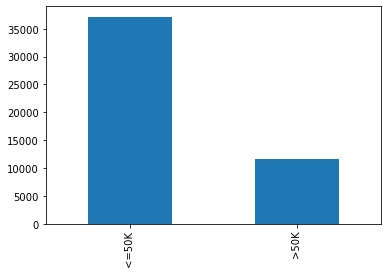

In [ ]:
features['income'].value_counts().plot(kind = 'bar');

Check the counts for other columns. If there are any duplicate columns, remove them. 

In [ ]:
other_columns_features = features.drop(['income'], axis = 1)

for i in other_columns_features.columns:
    print(f'values in feature {i}:')
    print(features[i].value_counts(),'\n')  

values in feature age:
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64 

values in feature workclass:
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64 

values in feature education:
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64 

values in feature education-num:
9     15784
10    10878
13     8025
14     2657
11  

after checking the value counts in each column, we found "education" and "education-num" have the same number of unique values, and for each value it has the same number of samples. So "education" and "education-num" are duplicate. We drop "education" column. 


In [8]:
features.drop(['education'], axis = 1, inplace = True)
features.shape

(48842, 13)

### Handle missing values

Check if there are any missing values. If yes, for some features remove the rows with missing values, and for some features replace the missing values with the average value of the column. 

In [ ]:
features.isnull().sum()

age                0
workclass          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex               16
capital-gain       0
capital-loss      39
hours-per-week     0
native-country     0
income             0
dtype: int64

There are two columns, "sex" and "capital-loss" having missing values. We revome the rows which have missing value in "sex" column; and for rows with missing value in "capital-loss" we replace missing value with mean value.

In [10]:
features.dropna(subset = ['sex'], axis = 0, inplace = True)
features.shape

(48826, 13)

In [11]:
features.fillna(features.mean(axis = 0),inplace = True)

/var/folders/53/42g8tbt17tngxpy9ywjvz0c00000gn/T/ipykernel_897/2130939254.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features.fillna(features.mean(axis = 0),inplace = True)


In [12]:
features.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Check Feature Distribution

Create a histogram plot of the numerical features. 

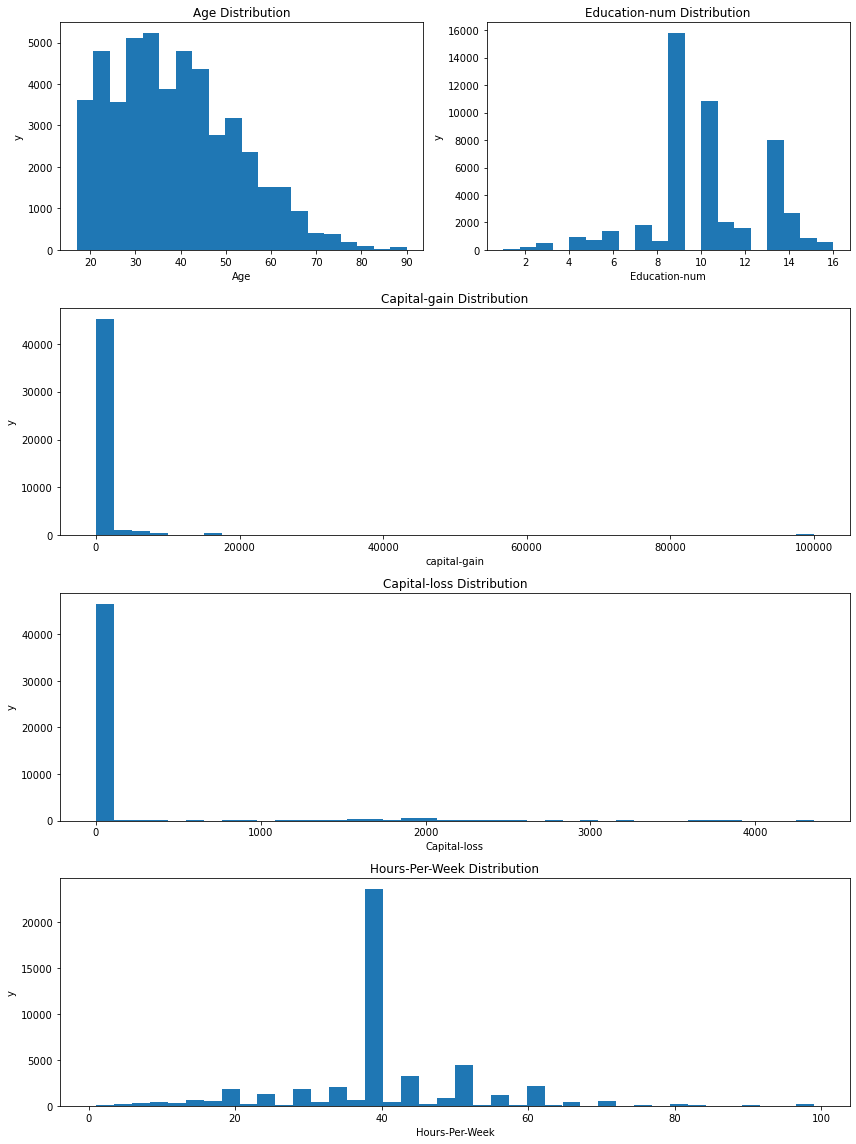

In [ ]:
numerical_columns_features = features.select_dtypes(include = 'number')

fig = plt.figure(figsize = (12,16))

axes1 = plt.subplot2grid((4,4), (0,0), colspan = 2)
axes2 = plt.subplot2grid((4,4), (0,2), colspan = 2)
axes3 = plt.subplot2grid((4,4), (1,0), colspan = 4)
axes4 = plt.subplot2grid((4,4), (2,0), colspan = 4)
axes5 = plt.subplot2grid((4,4), (3,0), colspan = 4)

axes1.hist(numerical_columns_features['age'],bins = 20);
axes1.set_title('Age Distribution', fontsize = 12)
axes1.set_xlabel('Age')
axes1.set_ylabel('y')

axes2.hist(numerical_columns_features['education-num'],bins = 20);
axes2.set_title('Education-num Distribution', fontsize = 12)
axes2.set_xlabel('Education-num')
axes2.set_ylabel('y')

axes3.hist(numerical_columns_features['capital-gain'],bins = 40);
axes3.set_title('Capital-gain Distribution', fontsize = 12)
axes3.set_xlabel('capital-gain')
axes3.set_ylabel('y')

axes4.hist(numerical_columns_features['capital-loss'],bins = 40);
axes4.set_title('Capital-loss Distribution', fontsize = 12)
axes4.set_xlabel('Capital-loss')
axes4.set_ylabel('y')

axes5.hist(numerical_columns_features['hours-per-week'],bins = 40);
axes5.set_title('Hours-Per-Week Distribution', fontsize = 12)
axes5.set_xlabel('Hours-Per-Week')
axes5.set_ylabel('y')

fig.tight_layout()

Plot the distributions of `age` and `hours-per-week`. Based on the plots, state the approximate average values for these two features.

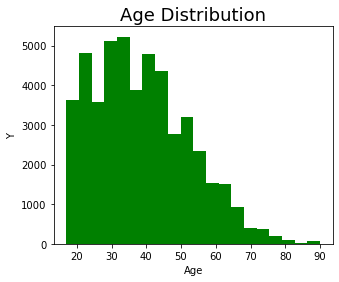

In [ ]:
plt.figure(figsize = (5,4))

plt.hist(features['age'],bins = 20, color = 'green',)
plt.title('Age Distribution',fontsize= 18)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Y', fontsize = 10)

plt.show()

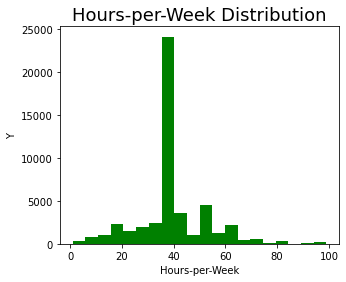

In [ ]:
plt.figure(figsize = (5,4))

plt.hist(features['hours-per-week'],bins = 20, color = 'green',)
plt.title('Hours-per-Week Distribution',fontsize= 18)
plt.xlabel('Hours-per-Week', fontsize = 10)
plt.ylabel('Y', fontsize = 10)

plt.show()

Based on the distribution graph of "age" and "hours-per-week", we can estimate the mean of "age" is about 36, and the mean of "hours-per-week" is about 40.

Using Seaborn, create a bar plot of the `occupation` feature with sub-bars (hue) for the `sex` feature. 

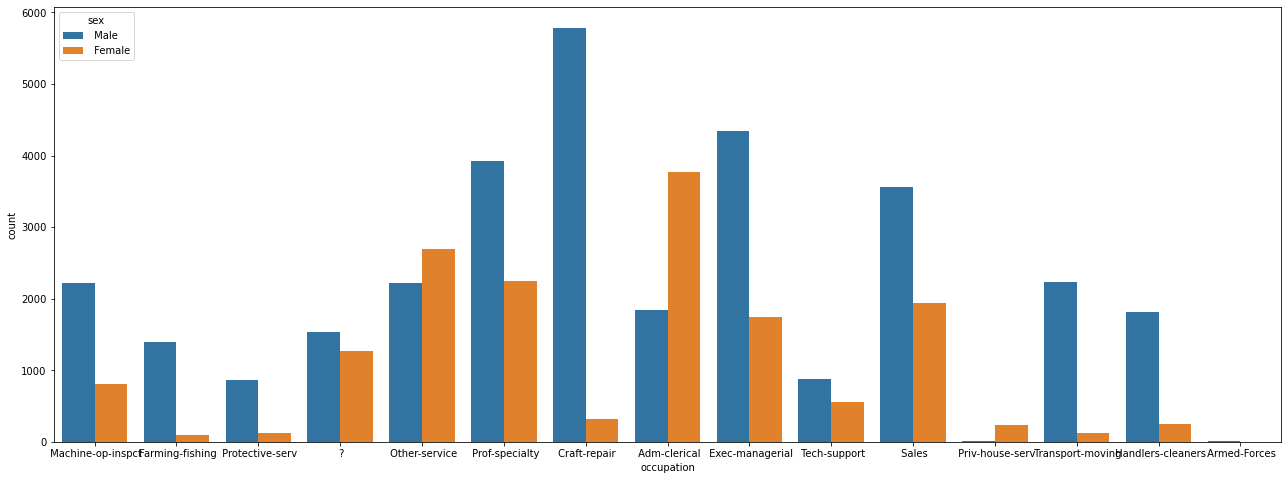

In [ ]:
import seaborn as sns

plt.figure(figsize = (22,8))
sns.countplot(data = features, x = 'occupation', hue = 'sex');

### Check Correlated Features

Calculate the correlation between the numerical features, and plot a heatmap of the correlations. 

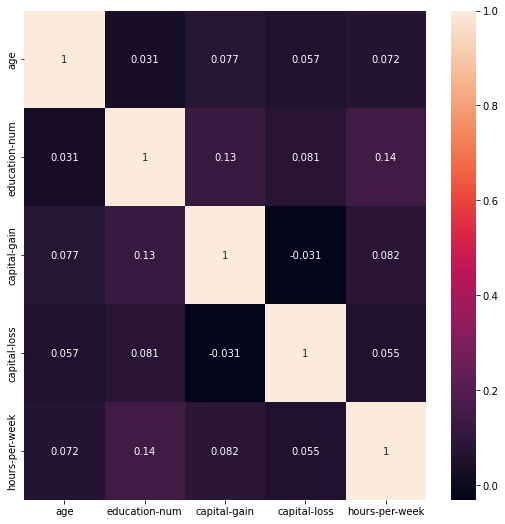

In [ ]:
correlation = features.corr()
plt.figure(figsize = (9,9))
sns.heatmap(correlation, annot = True);

Based on the heatmap, the 4 numerical columns are lowly correlated. 

### Encoding Categorical Features

Use the Ordinal Encoder in scikit-learn to encode all columns with text data, except for the column `income`. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns_features = features[['workclass','marital-status',
                                         'occupation','relationship',
                                         'race','sex',
                                         'native-country']]

ordinalEncoder = OrdinalEncoder()
categorical_columns_ordinal = ordinalEncoder.fit_transform(categorical_columns_features)

categorical_columns_ordinal

array([[ 4.,  4.,  7., ...,  2.,  1., 39.],
       [ 4.,  2.,  5., ...,  4.,  1., 39.],
       [ 2.,  2., 11., ...,  4.,  1., 39.],
       ...,
       [ 4.,  6.,  1., ...,  4.,  0., 39.],
       [ 4.,  4.,  1., ...,  4.,  1., 39.],
       [ 5.,  2.,  4., ...,  4.,  0., 39.]])

In [19]:
features[['workclass',
          'marital-status',
          'occupation',
          'relationship',
          'race','sex',
          'native-country']] = pd.DataFrame(categorical_columns_ordinal, 
                                            columns = categorical_columns_features.columns,
                                            index = categorical_columns_features.index)

features.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4.0,7,4.0,7.0,3.0,2.0,1.0,0,0.0,40,39.0,<=50K
1,38,4.0,9,2.0,5.0,0.0,4.0,1.0,0,0.0,50,39.0,<=50K
2,28,2.0,12,2.0,11.0,0.0,4.0,1.0,0,0.0,40,39.0,>50K
3,44,4.0,10,2.0,7.0,0.0,2.0,1.0,7688,0.0,40,39.0,>50K
4,18,0.0,10,4.0,0.0,3.0,4.0,0.0,0,0.0,30,39.0,<=50K


Use the Label Encoder in scikit-learn to encode the feature `income`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

income_feat = features[['income']]
labelEncoder = LabelEncoder()
income_feat_label = labelEncoder.fit_transform(income_feat)

income_feat_label

/Users/wly/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, ..., 0, 0, 1])

In [21]:
features[['income']] = pd.DataFrame(income_feat_label, 
                                    columns = income_feat.columns,
                                    index = income_feat.index)
features.head()                              

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4.0,7,4.0,7.0,3.0,2.0,1.0,0,0.0,40,39.0,0
1,38,4.0,9,2.0,5.0,0.0,4.0,1.0,0,0.0,50,39.0,0
2,28,2.0,12,2.0,11.0,0.0,4.0,1.0,0,0.0,40,39.0,1
3,44,4.0,10,2.0,7.0,0.0,2.0,1.0,7688,0.0,40,39.0,1
4,18,0.0,10,4.0,0.0,3.0,4.0,0.0,0,0.0,30,39.0,0


### Scaling Numerical Features

Create target labels named `y` consisting of the `income` column, and a data label named `X` including all remaining columns.

In [ ]:
y = features['income']
X = features.drop(['income'], axis = 1)
X.head(3)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,4.0,7,4.0,7.0,3.0,2.0,1.0,0,0.0,40,39.0
1,38,4.0,9,2.0,5.0,0.0,4.0,1.0,0,0.0,50,39.0
2,28,2.0,12,2.0,11.0,0.0,4.0,1.0,0,0.0,40,39.0


Split the data and targets into train and test sets, where the test set will be 25% of all data. Use a random seed of 123. Print the shapes of the train and test sets. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 123, test_size = 0.25, stratify = y)
print("X_train shape: ",X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (36619, 12)
X_test shape:  (12207, 12)
y_train shape:  (36619,)
y_test shape:  (12207,)


Use standardization to scale all columns in the data to have 0 mean and 1 standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

stdEncoder = StandardScaler()

X_train_std = stdEncoder.fit_transform(X_train)
X_test_std = stdEncoder.fit_transform(X_test)

In [89]:
X_test_std

array([[ 0.53730411,  0.08854478,  1.13155729, ..., -0.21360324,
        -0.0143054 ,  0.2866509 ],
       [-1.1367686 ,  0.08854478, -0.42526659, ..., -0.21360324,
        -0.0143054 , -4.84059414],
       [-0.48169667,  2.11263877,  2.2991752 , ..., -0.21360324,
         4.77108046, -4.84059414],
       ...,
       [ 0.39173257,  0.08854478, -1.98209047, ..., -0.21360324,
        -0.0143054 ,  0.2866509 ],
       [ 1.04680451,  1.43794078,  1.13155729, ..., -0.21360324,
         1.6078593 ,  0.2866509 ],
       [ 0.97401874,  0.08854478, -0.42526659, ..., -0.21360324,
        -0.17652187,  0.2866509 ]])

## Training Classifiers 

Train all 8 studied classifiers on the training set and evaluate the accuracy on the test set. Use the default values for the classifiers, unless instructed otherwise in the following lines. 
They include:
- k-Nearest Neighbors
- SVM (use the linear kernel)
- Logistic Regression
- Decision Trees
- Random Forest (use at least 50 estimators)
- Naive Bayes (GaussianNB)
- Perceptron (try different number of epochs and learning rate)
- SGD (use 'hinge' loss, at least 50 iterations)

Report which models have the best performance.

In [ ]:
# k-Nearest Neighbors
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier()

knn_model.fit(X_train_std, y_train)
accuracy = knn_model.score(X_test_std, y_test)

print(f'accuracy is: {round(accuracy,4) * 100}%')

/Users/wly/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy is: 83.14%


In [97]:
# SVM model

from sklearn.svm import SVC

linear_svm = SVC(kernel = 'linear')

linear_svm.fit(X_train_std, y_train)
accuracy = linear_svm.score(X_test_std, y_test)

print(f'accuracy is:{round(accuracy,4)*100}%')


accuracy is:81.12%


In [98]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_std,y_train)
accuracy = lr_model.score(X_test_std, y_test)

print(f'accuracy is: {round(accuracy,4) * 100}%')

accuracy is: 82.08%


In [99]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

tree_model.fit(X_train_std, y_train)
accuracy = tree_model.score(X_test_std,y_test)

print(f'accuracy is: {round(accuracy,4) * 100}%')

accuracy is: 84.06%


In [100]:
# Random Forest (use at least 50 estimators)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion = 'gini', n_estimators = 50)
rf_model.fit(X_train_std, y_train)
rf_model.score(X_test_std, y_test)

print('accuracy is: {0:5.2f}%'.format(accuracy * 100))

accuracy is: 84.06%


In [101]:
# Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train_std,y_train)
accuracy = nb_model.score(X_test_std, y_test)

print('accuracy is: {0:5.2f}%'.format(accuracy * 100))


accuracy is: 79.78%


In [102]:
# Perceptron model_1 (try different number of epochs and learning rate)
from sklearn.linear_model import Perceptron

ppn_model_1 = Perceptron(max_iter = 40, eta0 = 0.1)

ppn_model_1.fit(X_train_std, y_train)
accuracy_1 = ppn_model_1.score(X_test_std, y_test)

print("accuracy is: {0:5.2f}%".format(accuracy_1 * 100))

accuracy is: 75.54%


In [103]:
# Perceptron model_2 (try different number of epochs and learning rate)
from sklearn.linear_model import Perceptron

ppn_model_2 = Perceptron(max_iter = 50, eta0 = 0.01)

ppn_model_2.fit(X_train_std, y_train)
accuracy_2 = ppn_model_2.score(X_test_std, y_test)

print("accuracy is: {0:5.2f}%".format(accuracy_2 * 100))

accuracy is: 75.54%


In [104]:
# Perceptron model_3 (try different number of epochs and learning rate)
from sklearn.linear_model import Perceptron

ppn_model_3 = Perceptron(max_iter = 60, eta0 = 0.001)

ppn_model_3.fit(X_train_std, y_train)
accuracy_3 = ppn_model_3.score(X_test_std, y_test)

print("accuracy is: {0:5.2f}%".format(accuracy_3 * 100))

accuracy is: 75.54%


In [105]:
# SGD (use 'hinge' loss, at least 50 iterations)
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()

sgd_model.fit(X_train_std, y_train)
accuracy = sgd_model.score(X_test_std, y_test)

print(f'accuracy is: {round(accuracy,4) * 100}%')


accuracy is: 81.16%


## Hyperparameter Tuning 

For the two best-performing approaches, perform hyperparameter tuning. Use a grid search for one approach with at least 5 values, and a random search for the other approach with at least 10 samples from the distribution. Choose between 1 and 3 hyperparameters, based on the used classifier.

Decision Tree and Random Forest are the best two approaches in my experiment, so I will operate hyperparameter tuning on these two models.I will implement grid search on Random Forest model and random search on Desicion Tree model.

In [107]:
# Grid Search on Random Forest model
from sklearn.model_selection import GridSearchCV

rf_model_gridsearch = RandomForestClassifier()
hyper_grid = {
    'n_estimators':[40,45,50,55,60],
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[4,7,9,10,14],
    'min_samples_leaf':[5,10,13,15,20]    
}

grid_search = GridSearchCV(rf_model_gridsearch, hyper_grid,scoring = 'accuracy')
result = grid_search.fit(X_train_std, y_train)

print(f'Accuracy: {round(result.best_score_,4) * 100}%')
print('Best parameters: {}'.format(result.best_params_))

Accuracy: 85.0%
Best parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 45}


In [110]:
accuracy = grid_search.score(X_test_std,y_test)
print(f'Accuarcy is: {round(accuracy,4) * 100}%')

Accuarcy is: 84.43%


In [111]:
#random search for Decision Tree
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

dt_random_search = DecisionTreeClassifier()

hyper_distribution = {'max_depth':randint(2,7),
                     'min_samples_split': randint(3,7),
                     'min_samples_leaf':randint(4,8)}

random_search = RandomizedSearchCV(dt_random_search, hyper_distribution, n_iter = 20, scoring = 'accuracy')
result = random_search.fit(X_train_std, y_train)

print("Accuracy:{}%".format(round(result.best_score_,4) * 100))
print("Best parameters: ", result.best_params_)

Accuracy:85.44%
Best parameters:  {'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 5}


In [120]:
accuray = random_search.score(X_test_std,y_test)
print('Accuracy is: {}%'.format(round(accuray,2) * 100))

Accuracy is: 84.0%


## Cross-Validation 

For the best performing method in the previous section, use 5-fold cross-validation to calculate the accuracy, and report the mean and standard deviation. 

Random Forest model has 85% accuracy in training data and 84.43% accuracy on test data;
Decision Tree model has 85.44% accuracy in training data and 84% accuracy on test data;
Random Forest model has better performance on test data. So I will use Random Forest model in this step.

In [ ]:

from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(criterion = 'gini',
                                 max_depth = 7,
                                 min_samples_leaf = 5,
                                 min_samples_split = 7,
                                 n_estimators = 45)

cv_result = cross_validate(rf_model, X_train_std, y_train, cv = 5)
cv_result


{'fit_time': array([0.40816307, 0.39591074, 0.4009521 , 0.38642669, 0.39326   ]),
 'score_time': array([0.02256894, 0.02280331, 0.02405405, 0.02255917, 0.02234483]),
 'test_score': array([0.85417804, 0.85185691, 0.86469143, 0.86127799, 0.85251946])}

In [124]:
scores = cv_result['test_score']
print ('The mean cross_validation accuracy is {0:5.3f} +/- {1:5.3f}'.format(scores.mean(), scores.std()))

The mean cross_validation accuracy is 0.857 +/- 0.005
